<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [58]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(16, 6))
%matplotlib inline

In [59]:
breast_cancer_csv = 'dat/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [60]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [62]:
breast_cancer.drop(columns=breast_cancer.columns[-1], 
        axis=1, 
        inplace=True)

In [63]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [64]:
breast_cancer.duplicated().sum()

0

### 3. Subset & Standardise

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to diagnosis specifically, so we are leaving diagnosis out.  Standardize the features.

In [92]:
# Select target column name
target_column = 'diagnosis'

# Save feature column names as a list 
feature_columns = breast_cancer.columns.drop('diagnosis')
#feature_columns = [c for c in breast_cancer.columns if c != 'diagnosis']
feature_columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [93]:
# Use feature_columns and target_column to subset data 
X = breast_cancer[feature_columns]
y = breast_cancer['diagnosis']

In [67]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [94]:
scaler = StandardScaler()
scaler.fit(X)
standardised_X = scaler.transform(X)

In [69]:
print(scaler.n_samples_seen_ , scaler.n_features_in_)

569 31


## Calculating explained variance of PCA components by hand

### 4. Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [71]:
# Create dataframe from Xs
# ANSWER
# Load the dataset as a pandas data frame
Xs = pd.DataFrame(standardised_X, columns = feature_columns)
Xs

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [72]:
# Calculate correlation matrix with .corr() method 
# ANSWER
corr_matrix = Xs.corr()

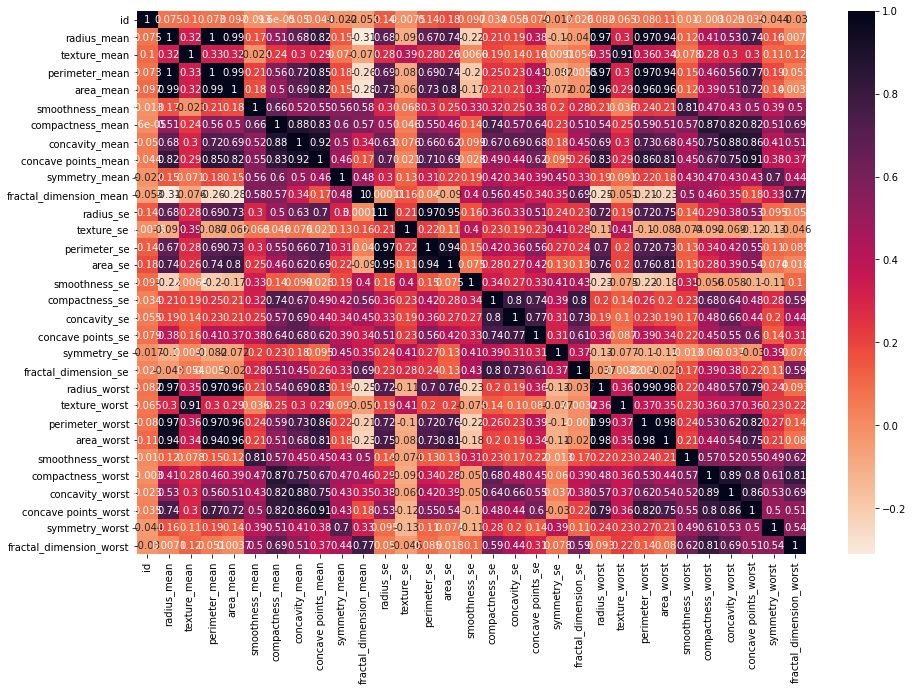

In [73]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

#plt.figure(figsize=(16,8))
cmap = sns.cm.rocket_r
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=cmap)
plt.show()

### 5. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [74]:
# Calculate eigenvalues and eigenvectors of correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

In [75]:
# How many eigenvalues are there?
print(eigenvalues.shape[0])
eigenvalues

31


array([1.32880574e+01, 5.69680537e+00, 2.83539505e+00, 1.98135718e+00,
       1.64881531e+00, 1.23467271e+00, 9.78273239e-01, 6.71752969e-01,
       4.60792428e-01, 4.03133096e-01, 3.49154976e-01, 2.93890434e-01,
       2.61146925e-01, 2.41330214e-01, 1.56973649e-01, 9.41285258e-02,
       7.98099486e-02, 5.90462723e-02, 5.25911946e-02, 4.91219277e-02,
       3.10707842e-02, 2.99412056e-02, 2.74305238e-02, 2.42490222e-02,
       1.80393609e-02, 1.54797297e-02, 8.17169884e-03, 6.89810286e-03,
       1.33040206e-04, 7.48376054e-04, 1.58933755e-03])

In [76]:
# How many eigenvectors are there?
print(eigenvectors.shape)
eigenvectors

(31, 31)


array([[-2.29121629e-02, -3.40684907e-02, -9.69384357e-02,
        -2.65980453e-02, -1.13275871e-02, -3.16733438e-01,
        -9.07115632e-01,  9.63624150e-02,  1.49115642e-01,
         1.69267515e-01, -5.81889971e-02, -6.72125159e-03,
         4.84108383e-03, -6.50009912e-03, -6.88594292e-03,
         2.75349185e-03, -7.77998301e-03,  1.97073716e-02,
        -5.44224782e-03,  2.04549082e-02,  9.87091673e-03,
        -6.19570677e-03, -3.19033693e-03,  1.02890273e-02,
        -4.23338835e-03, -1.32609967e-03, -2.57132397e-03,
         1.62387479e-03, -7.12258084e-05, -6.85226337e-04,
         1.89172407e-05],
       [-2.18913018e-01, -2.33271401e-01,  1.13937863e-02,
         4.21879503e-02,  3.81298606e-02,  2.95885214e-02,
         4.22987777e-02,  1.16427419e-01, -4.62708347e-02,
         2.24027044e-01,  7.94660810e-02, -4.22137877e-02,
        -5.06039273e-02, -1.24969877e-02,  5.90545533e-02,
        -5.07891563e-02,  1.50008977e-01, -2.09908003e-01,
         1.56773206e-01,  2.11

In [77]:
# Print the first eigenvalue
print(eigenvalues[0])

13.288057414153084


In [78]:
# Print the corresponding eigenvector
for x, y in enumerate(eigenvalues):
    print('%i: ' %x, y)

0:  13.288057414153084
1:  5.696805368293616
2:  2.835395048110788
3:  1.981357176418044
4:  1.648815305077684
5:  1.2346727078123851
6:  0.9782732390565075
7:  0.6717529685576924
8:  0.4607924276414398
9:  0.40313309626311983
10:  0.34915497591077627
11:  0.2938904335184761
12:  0.2611469247969258
13:  0.241330214358951
14:  0.15697364921992366
15:  0.0941285258057822
16:  0.07980994856822614
17:  0.05904627225476723
18:  0.052591194574765375
19:  0.04912192765973502
20:  0.031070784230945076
21:  0.029941205629433636
22:  0.02743052380315944
23:  0.024249022217373923
24:  0.018039360873103254
25:  0.015479729684990345
26:  0.008171698840056536
27:  0.006898102861401852
28:  0.0001330402064650235
29:  0.0007483760543411841
30:  0.0015893375460604795


### 6. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [79]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    var_exp = [ i * 100 / eig_vals.sum() for i in eig_vals ]
    
    cum_var_exp = np.cumsum(var_exp)
    
    return cum_var_exp

In [80]:
calculate_cum_var_exp(eigenvalues)

array([ 42.86470134,  61.24149285,  70.38792849,  76.77940325,
        82.0981623 ,  86.08097748,  89.23669761,  91.40364267,
        92.89006986,  94.1904992 ,  95.31680557,  96.26483923,
        97.10724866,  97.88573323,  98.39209984,  98.69574024,
        98.95319169,  99.14366353,  99.31331255,  99.47177038,
        99.57199872,  99.66858325,  99.75706881,  99.83529146,
        99.89348295,  99.94341756,  99.96977788,  99.99202983,
        99.99245899,  99.9948731 , 100.        ])

In [81]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

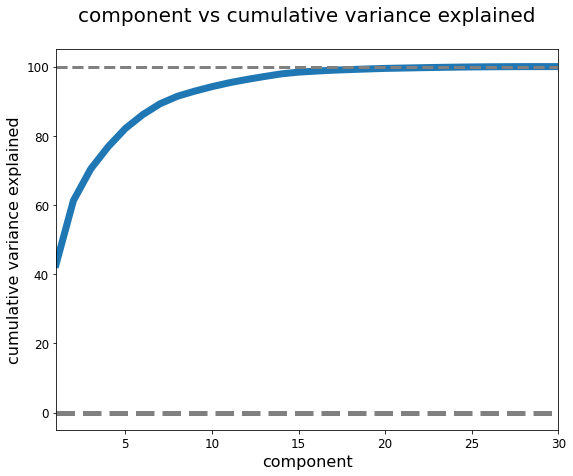

In [82]:
plot_var_exp(eigenvalues)

### 7. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [83]:
# Instantiate the PCA class
pca = PCA()

# Fit PCA with standardised features
pca.fit(Xs)

PCA()

In [84]:
pca.explained_variance_

array([1.33114519e+01, 5.70683496e+00, 2.84038694e+00, 1.98484548e+00,
       1.65171815e+00, 1.23684643e+00, 9.79995551e-01, 6.72935632e-01,
       4.61603682e-01, 4.03842838e-01, 3.49769685e-01, 2.94407846e-01,
       2.61606691e-01, 2.41755091e-01, 1.57250011e-01, 9.42942450e-02,
       7.99504590e-02, 5.91502270e-02, 5.26837847e-02, 4.92084099e-02,
       3.11254863e-02, 2.99939190e-02, 2.74788170e-02, 2.42917142e-02,
       1.80711203e-02, 1.55069827e-02, 8.18608563e-03, 6.91024741e-03,
       1.59213568e-03, 7.49693618e-04, 1.33274432e-04])

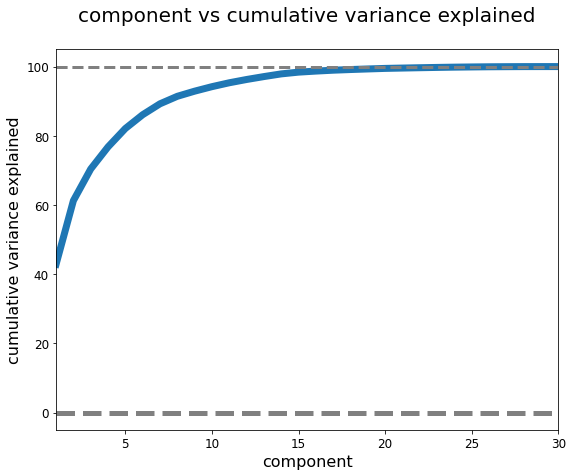

In [85]:
plot_var_exp(pca.explained_variance_)


In [95]:
# Instantiate the PCA class with PCA set at 16 components
pca = PCA(n_components=16)
# Fit PCA with standardised features
pca.fit(standardised_X)
# Apply dimensionality reduction (transform) to X
X_pca = pca.transform(standardised_X)

In [87]:
col = ['PC %i' %(i+1) for i in range(pca.components_.shape[1])]
col

['PC 1',
 'PC 2',
 'PC 3',
 'PC 4',
 'PC 5',
 'PC 6',
 'PC 7',
 'PC 8',
 'PC 9',
 'PC 10',
 'PC 11',
 'PC 12',
 'PC 13',
 'PC 14',
 'PC 15',
 'PC 16',
 'PC 17',
 'PC 18',
 'PC 19',
 'PC 20',
 'PC 21',
 'PC 22',
 'PC 23',
 'PC 24',
 'PC 25',
 'PC 26',
 'PC 27',
 'PC 28',
 'PC 29',
 'PC 30',
 'PC 31']

In [88]:
# Show principal components as a dataframe


pc = pd.DataFrame(pca.components_, columns=col)
pc

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31
0,0.022912,0.218913,0.103844,0.227535,0.221046,0.142415,0.239067,0.258280,0.260738,0.137978,...,0.228009,0.104515,0.236637,0.224932,0.127824,0.209885,0.228602,0.250746,0.122680,0.131560
1,-0.034068,-0.233271,-0.060044,-0.214589,-0.230669,0.186422,0.152455,0.060542,-0.034167,0.190685,...,-0.219296,-0.045501,-0.199296,-0.218985,0.172563,0.144254,0.098527,-0.007534,0.142619,0.275702
2,0.096938,-0.011394,0.066892,-0.012125,0.026293,-0.103182,-0.074769,0.001759,-0.027580,-0.040962,...,-0.049406,-0.039829,-0.050432,-0.013189,-0.255329,-0.234514,-0.172025,-0.170481,-0.270516,-0.229474
3,-0.026598,0.042188,-0.602954,0.042753,0.054115,0.158098,0.031818,0.019497,0.065785,0.067503,...,0.015660,-0.633120,0.014069,0.025971,0.014523,-0.092562,-0.074807,0.005306,-0.037129,-0.078971
4,-0.011328,0.038130,-0.049091,0.037716,0.010562,-0.365750,0.011787,0.086513,-0.043667,-0.305379,...,-0.004280,-0.092552,0.007599,-0.027414,-0.325860,0.121503,0.188281,0.043124,-0.244246,0.093699
5,0.316733,-0.029589,0.031394,-0.028394,-0.006113,0.262509,0.004904,0.002356,0.034509,-0.335082,...,-0.004522,0.045175,-0.012921,0.024033,0.365049,-0.034043,-0.017962,0.029549,-0.451404,0.092480
6,0.907116,-0.042299,0.014994,-0.043589,-0.028926,-0.140340,-0.045303,-0.032553,-0.081422,0.118259,...,-0.016646,-0.009460,-0.014526,-0.000737,-0.067068,0.050756,0.035201,-0.020724,0.234014,0.034717
7,-0.096362,-0.116427,0.001875,-0.106272,-0.047415,-0.123541,0.043146,-0.102436,-0.136923,-0.098875,...,-0.007508,0.006618,0.002162,0.066173,-0.116496,0.136509,-0.067086,-0.166501,-0.041440,0.372034
8,-0.149116,0.046271,0.088727,0.036231,0.080650,-0.278996,-0.099214,-0.075750,-0.116569,-0.315150,...,0.070225,0.008572,0.058854,0.097035,0.173257,0.111218,0.035467,-0.052322,0.188266,0.087222
9,-0.169268,-0.224027,0.119457,-0.226345,-0.186004,-0.061338,-0.195186,0.033956,-0.142617,0.135615,...,-0.099810,0.106693,-0.098217,-0.061798,0.169128,-0.064453,0.196620,0.051216,0.103089,-0.112914


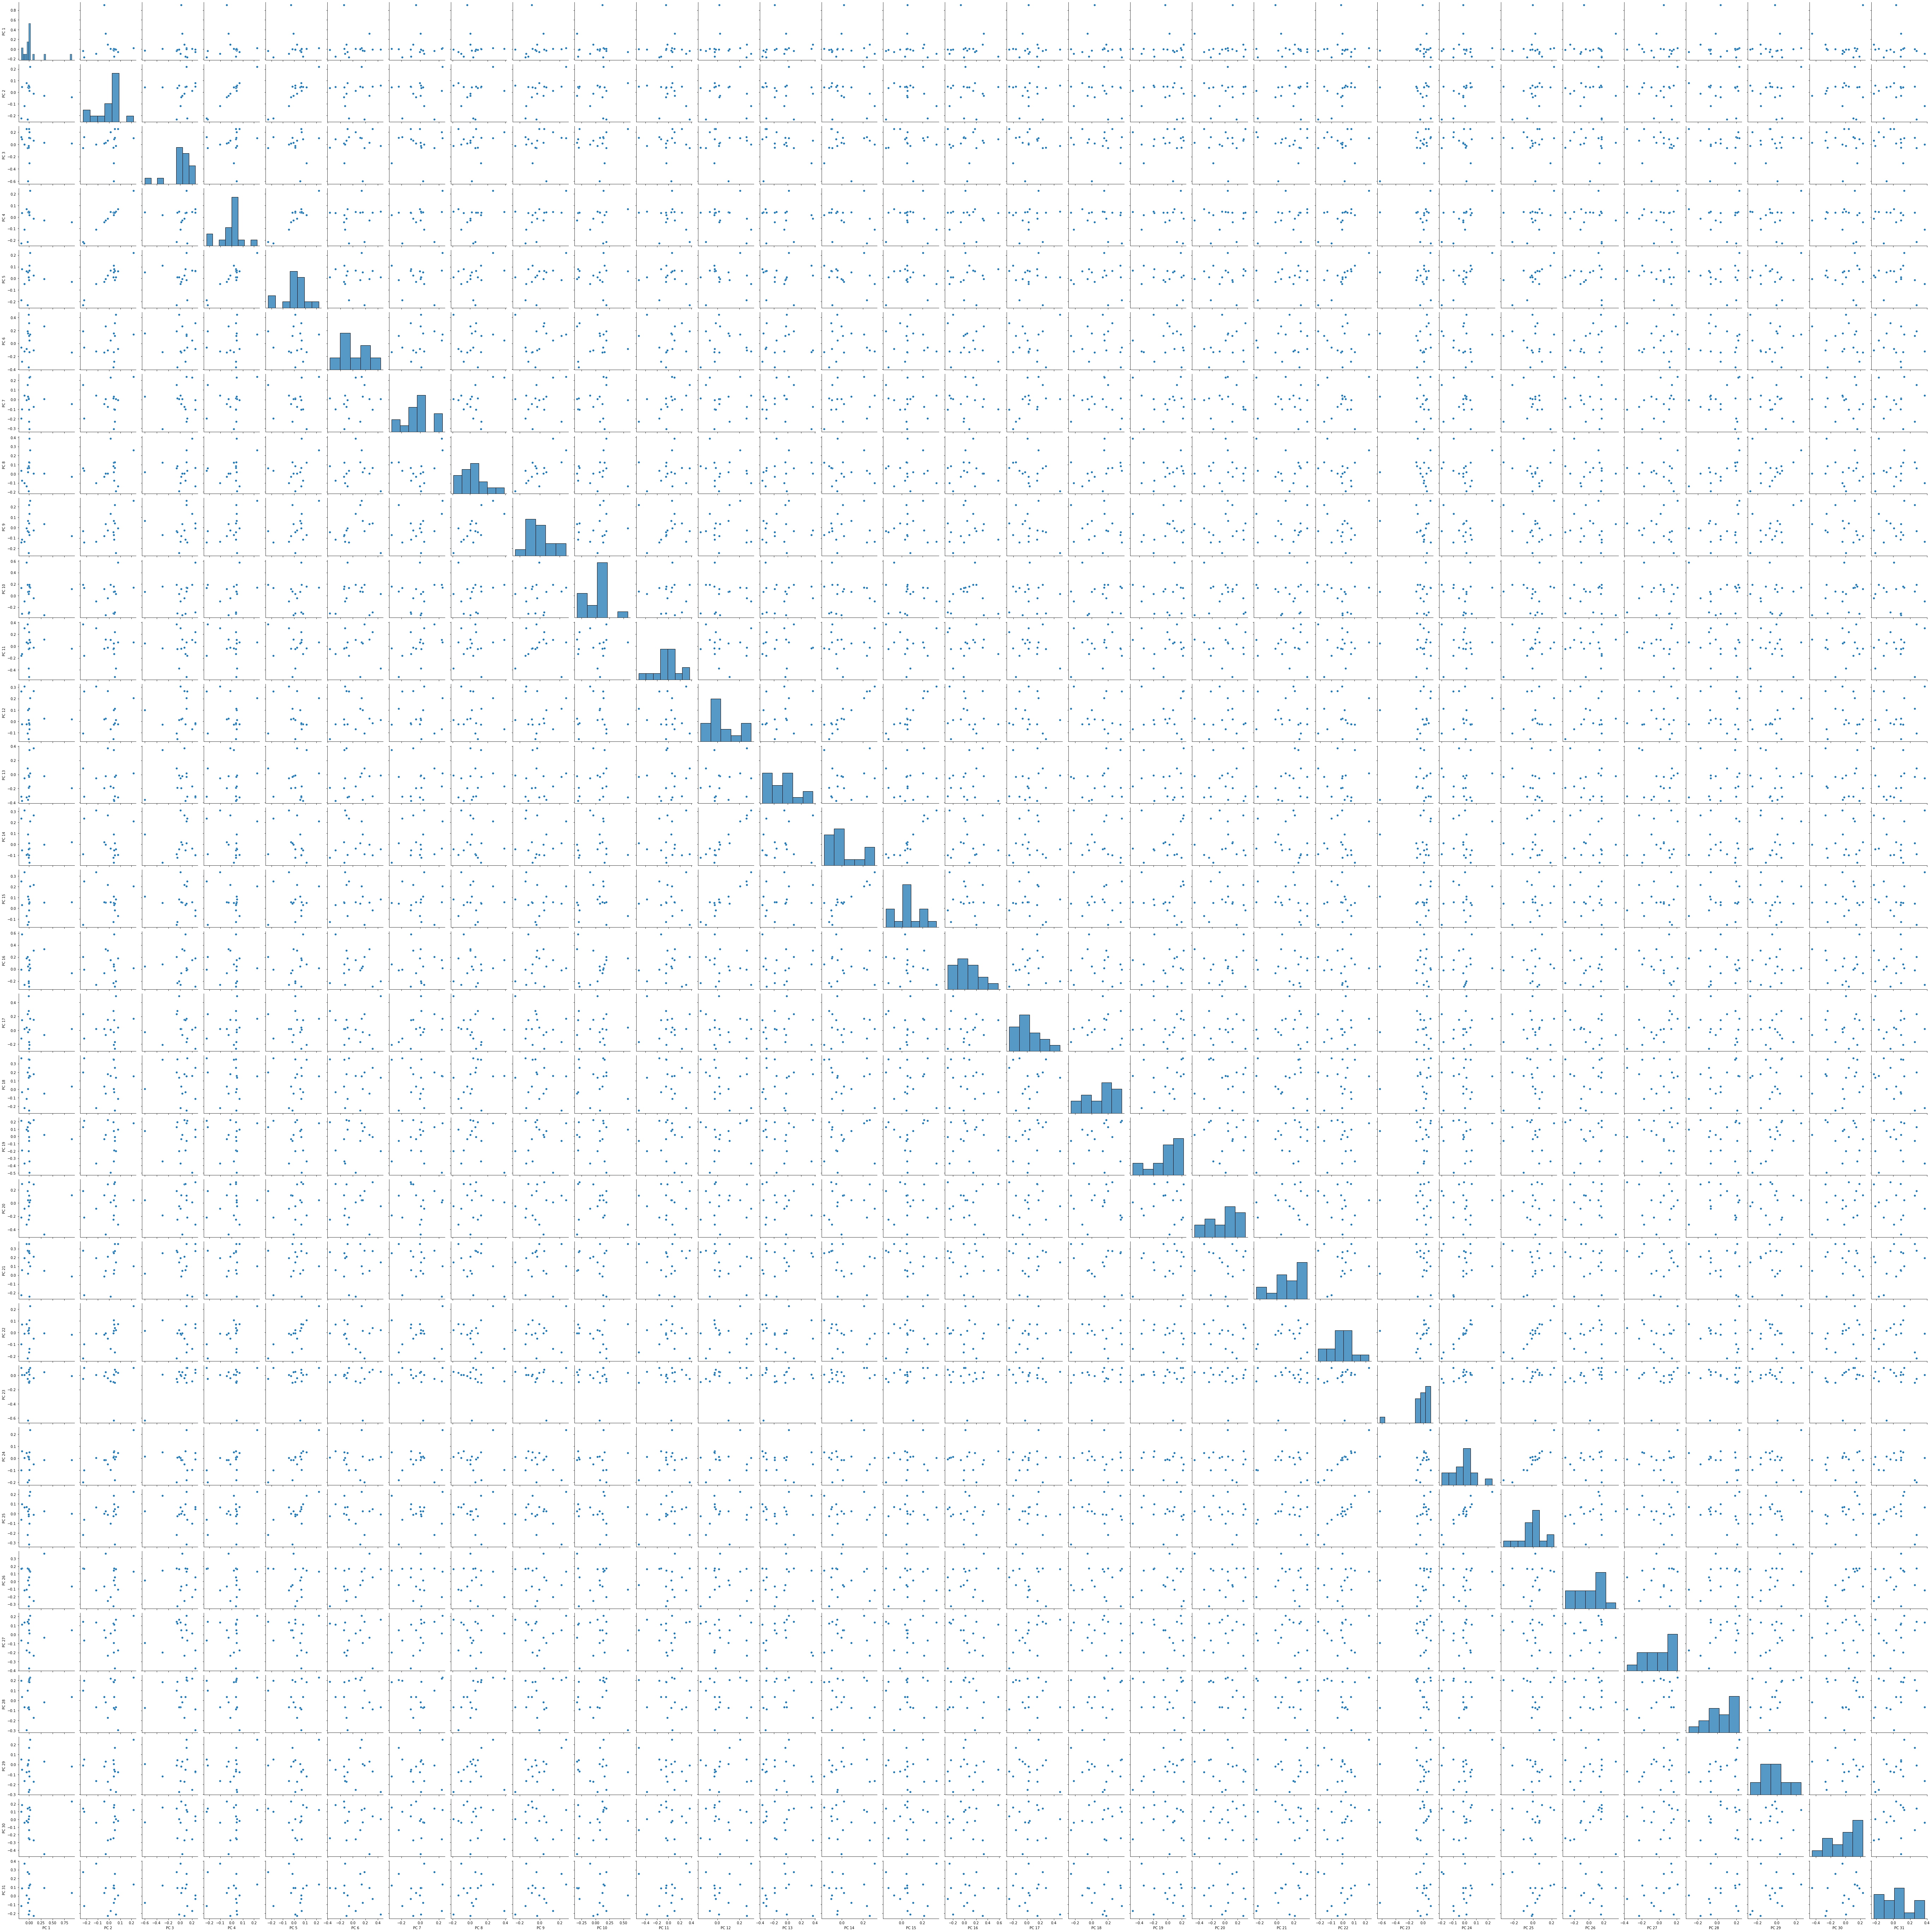

In [89]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(pc)

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

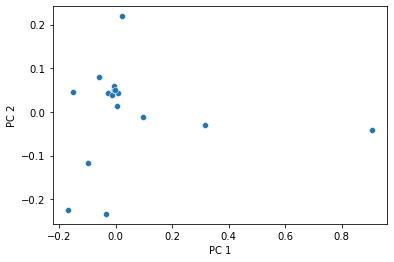

In [90]:
# Create scatter plot PC1 vs PC2
sns.scatterplot(x=pc['PC 1'], y=pc['PC 2'])

### 8. Split Data to 80/20.  Use KNN with cross-validation to find score.

i.  Use Standardised X and compare with ii. PCA-transformed data you got in 7 as X (features)

In [96]:
# ANSWER
# Split PCA dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [97]:
# Split standardised data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(standardised_X, y, test_size=0.2, random_state=42)

In [98]:
# ANSWER
# Set KNN classifier to use 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5)

# CV accuracy of KNN using standardised data 
standard_scores = cross_val_score(knn5, Xs_train, ys_train, cv=5)
print("Number of features in standardised data:       ", Xs.shape[1])
print("5-fold CV accuracy using standardised data:    ", standard_scores.mean())

Number of features in standardised data:        31
5-fold CV accuracy using standardised data:     0.9626373626373628


In [99]:
# ANSWER
# CV accuracy of KNN using PCA-transformed data
pca_scores = cross_val_score(knn5, X_train, y_train, cv=5)
print("Number of features in PCA-transformed data:    ", std_x_pca.shape[1])
print("5-fold CV accuracy using PCA-transformed data: ", pca_scores.mean())

Number of features in PCA-transformed data:     16
5-fold CV accuracy using PCA-transformed data:  0.9626373626373628


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



